<a href="https://colab.research.google.com/github/iamrafinawaz/Data-Analytics/blob/main/KNN_%26_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1:** K-Nearest Neighbors (KNN) is a simple and intuitive algorithm that makes predictions based on the closest data points, determined by a chosen distance metric, such as Euclidean distance. It is widely used for classification and regression tasks due to its simplicity.

**2:** KNN Classification assigns a data point to the most common class among its nearest neighbors, while KNN Regression calculates the average value of the neighbors to predict a continuous output.

**3:** The distance metric in KNN determines how the algorithm measures similarity or closeness between data points. It influences the neighbors selected and, consequently, the accuracy of predictions.

**4:** The Curse of Dimensionality refers to a phenomenon where KNN's performance degrades in high-dimensional data, as data points become sparse, making it harder to identify meaningful neighbors.

**5:** Choosing the best value for K, the number of neighbors, is crucial. Cross-validation helps test various K values to achieve a balance between overfitting (low K) and underfitting (high K).

**6:** KD Tree and Ball Tree are data structures used to optimize KNN. They improve the efficiency of neighbor searches by organizing data points spatially, especially in large datasets.

**7:** KD Tree is more effective for lower-dimensional data, while Ball Tree is advantageous for higher-dimensional data. The choice depends on the dataset's dimensionality and characteristics.

**8:** Disadvantages of KNN include slow performance on large datasets, sensitivity to noisy data, and the need for meaningful feature scaling to ensure the distance metric is effective.

**9:** Feature scaling standardizes the range of data features, making the distance metric more reliable. Without scaling, KNN might give undue importance to features with larger ranges.

**10:** PCA (Principal Component Analysis) is a technique for reducing the dimensionality of data while retaining the most important information by identifying patterns and directions of maximum variance.

**11:** PCA works by transforming the data into a new coordinate system where the axes (principal components) correspond to the directions of maximum variance in the data.

**12:** The geometric intuition behind PCA is that it rotates the data space, aligning it along the directions with the highest variance, simplifying the dataset while preserving its essence.

**13:** Feature Selection identifies the most relevant features from the dataset, while Feature Extraction (e.g., PCA) transforms data to create new features that summarize the original information.

**14:** Eigenvalues represent the amount of variance explained by each principal component, and Eigenvectors define the directions of these components in the data space.

**15:** The number of components in PCA is decided based on the cumulative explained variance ratio. Typically, components are chosen to preserve 90-95% of the variance, balancing accuracy and simplicity.

**16:** PCA can aid classification by removing noise and redundant features, improving the model's efficiency and accuracy, especially for high-dimensional datasets.

**17:** Limitations of PCA include loss of interpretability, as transformed features lack original meaning, and its inability to handle non-linear relationships in the data effectively.

**18:** KNN and PCA work well together by combining dimensionality reduction (PCA) with instance-based learning (KNN), making the algorithm more efficient and robust.

**19:** KNN addresses missing data by imputing missing values using the average or majority class from the nearest neighbors, ensuring better data integrity.

**20:** PCA focuses on maximizing data variance for unsupervised tasks, while Linear Discriminant Analysis (LDA) maximizes class separation, making it suitable for supervised learning problems.

In [1]:
# 21
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

data = load_iris()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Model Accuracy:", accuracy_score(y_test, y_pred))

Model Accuracy: 1.0


In [16]:
# 22


import numpy as np
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

X, y = make_regression(n_samples=100, n_features=1, noise=0.1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn_regressor = KNeighborsRegressor()
knn_regressor.fit(X_train, y_train)
y_pred = knn_regressor.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

Mean Squared Error: 59.76674843908529


In [12]:
import numpy as np
y_categorical = np.where(y > np.median(y), 1, 0)

X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

knn_euclidean = KNeighborsClassifier(metric='euclidean')
knn_manhattan = KNeighborsClassifier(metric='manhattan')
knn_euclidean.fit(X_train, y_train)
knn_manhattan.fit(X_train, y_train)
acc_euclidean = accuracy_score(y_test, knn_euclidean.predict(X_test))
acc_manhattan = accuracy_score(y_test, knn_manhattan.predict(X_test))
print("Euclidean Accuracy:", acc_euclidean)
print("Manhattan Accuracy:", acc_manhattan)

Euclidean Accuracy: 0.95
Manhattan Accuracy: 0.95


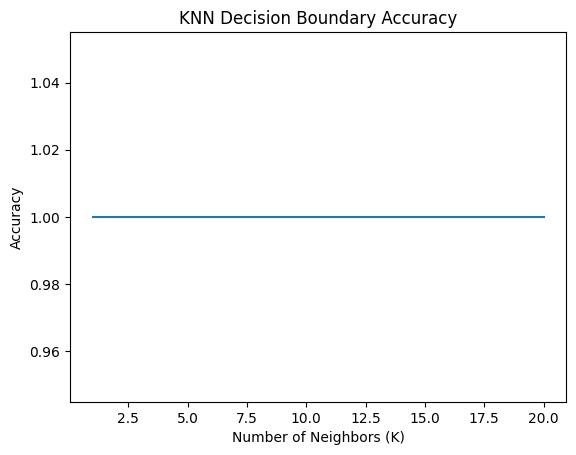

In [6]:
# 24
import matplotlib.pyplot as plt
import numpy as np

k_values = range(1, 21)
accuracies = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracies.append(accuracy_score(y_test, knn.predict(X_test)))

plt.plot(k_values, accuracies)
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.title('KNN Decision Boundary Accuracy')
plt.show()

In [19]:
#25

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

accuracy_unscaled = accuracy_score(y_test, y_pred)
print(f"Accuracy without scaling: {accuracy_unscaled}")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_scaled = KNeighborsClassifier()
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)

accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
print(f"Accuracy with scaling: {accuracy_scaled}")

Accuracy without scaling: 1.0
Accuracy with scaling: 1.0


In [20]:
# 26
from sklearn.decomposition import PCA

X_synthetic = np.random.rand(100, 5)
pca = PCA()
pca.fit(X_synthetic)
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

Explained Variance Ratio: [0.26468184 0.21489573 0.20168855 0.17842994 0.14030394]


In [21]:
# 27
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    X_pca, y, test_size=0.2, random_state=42
)
knn_with_pca = KNeighborsClassifier()
knn_without_pca = KNeighborsClassifier()
knn_with_pca.fit(X_train_pca, y_train_pca)
knn_without_pca.fit(X_train, y_train)
print("Accuracy with PCA:", accuracy_score(y_test_pca, knn_with_pca.predict(X_test_pca)))
print("Accuracy without PCA:", accuracy_score(y_test, knn_without_pca.predict(X_test)))

Accuracy with PCA: 1.0
Accuracy without PCA: 1.0


In [22]:
# 28
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': range(1, 21), 'metric': ['euclidean', 'manhattan']}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 14}


In [23]:
# 29
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
misclassified_samples = (y_test != y_pred).sum()
print("Number of Misclassified Samples:", misclassified_samples)

Number of Misclassified Samples: 0


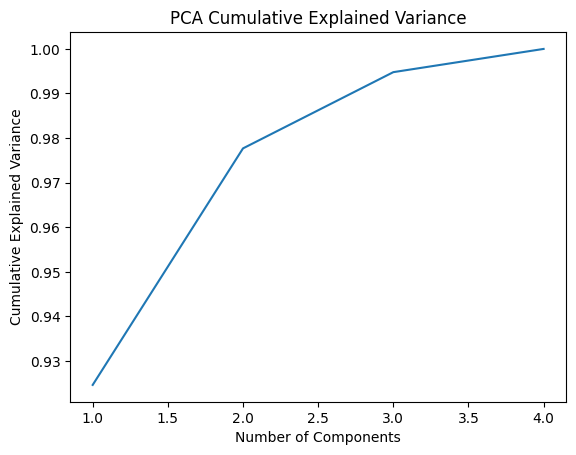

In [24]:
# 30
pca = PCA()
pca.fit(X)
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Cumulative Explained Variance')
plt.show()

In [25]:
# 31
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn_uniform = KNeighborsClassifier(weights='uniform')
knn_distance = KNeighborsClassifier(weights='distance')
knn_uniform.fit(X_train, y_train)
knn_distance.fit(X_train, y_train)
acc_uniform = accuracy_score(y_test, knn_uniform.predict(X_test))
acc_distance = accuracy_score(y_test, knn_distance.predict(X_test))
print("Accuracy (Uniform Weights):", acc_uniform)
print("Accuracy (Distance Weights):", acc_distance)

Accuracy (Uniform Weights): 1.0
Accuracy (Distance Weights): 1.0


In [26]:
# 32
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

k_values = [1, 5, 10, 15]
errors = []
for k in k_values:
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    knn_regressor.fit(X_train, y_train)
    errors.append(mean_squared_error(y_test, knn_regressor.predict(X_test)))
print("MSE for K values:", dict(zip(k_values, errors)))

MSE for K values: {1: 0.0, 5: 0.007999999999999997, 10: 0.01333333333333333, 15: 0.010222222222222216}


In [27]:
# 33
import pandas as pd
from sklearn.impute import KNNImputer

data_with_nan = pd.DataFrame({"Feature1": [1, 2, np.nan, 4], "Feature2": [np.nan, 2, 3, 4]})
imputer = KNNImputer(n_neighbors=2)
imputed_data = imputer.fit_transform(data_with_nan)
print("Imputed Data:", imputed_data)

Imputed Data: [[1. 3.]
 [2. 2.]
 [3. 3.]
 [4. 4.]]


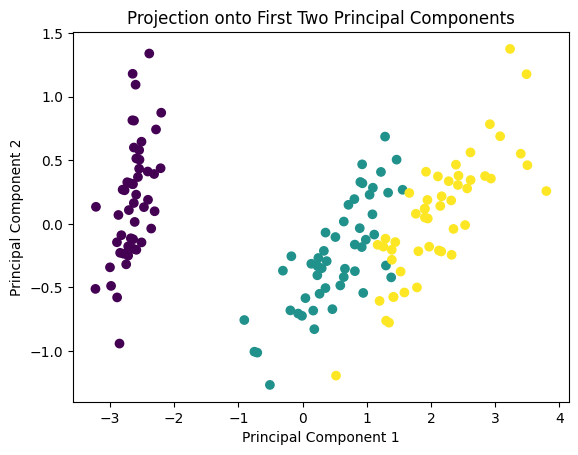

In [28]:
# 34
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Projection onto First Two Principal Components")
plt.show()

In [29]:
# 35
knn_kd = KNeighborsClassifier(algorithm='kd_tree')
knn_ball = KNeighborsClassifier(algorithm='ball_tree')
knn_kd.fit(X_train, y_train)
knn_ball.fit(X_train, y_train)
acc_kd = accuracy_score(y_test, knn_kd.predict(X_test))
acc_ball = accuracy_score(y_test, knn_ball.predict(X_test))
print("KD Tree Accuracy:", acc_kd)
print("Ball Tree Accuracy:", acc_ball)

KD Tree Accuracy: 1.0
Ball Tree Accuracy: 1.0


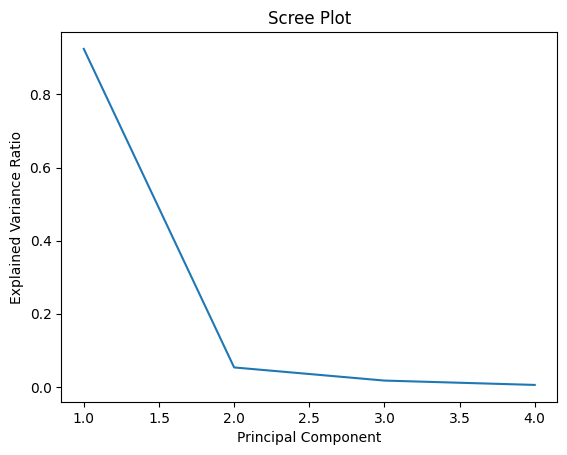

In [30]:
# 36
pca = PCA()
pca.fit(X)
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("Scree Plot")
plt.show()

In [31]:
# 37
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Classification Report:", classification_report(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1-Score:", f1_score(y_test, y_pred, average='weighted'))

Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Precision: 1.0
Recall: 1.0
F1-Score: 1.0


In [33]:
# 38
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
accuracies = []
for n in range(1, min(X.shape[0], X.shape[1]) + 1):
    pca = PCA(n_components=n)
    X_transformed = pca.fit_transform(X)
    X_train_transformed, X_test_transformed, y_train, y_test = train_test_split(
        X_transformed, y, test_size=0.2, random_state=42
    )
    knn = KNeighborsClassifier()
    knn.fit(X_train_transformed, y_train)
    accuracies.append(accuracy_score(y_test, knn.predict(X_test_transformed)))
print("Accuracies for different components:", accuracies)

Accuracies for different components: [1.0, 1.0, 1.0, 1.0]


In [34]:
# 39
leaf_sizes = [5, 10, 30, 50]
accuracy_leaf = []
for leaf_size in leaf_sizes:
    knn = KNeighborsClassifier(leaf_size=leaf_size)
    knn.fit(X_train, y_train)
    accuracy_leaf.append(accuracy_score(y_test, knn.predict(X_test)))
print("Accuracy for different leaf_size values:", dict(zip(leaf_sizes, accuracy_leaf)))

Accuracy for different leaf_size values: {5: 1.0, 10: 1.0, 30: 1.0, 50: 1.0}


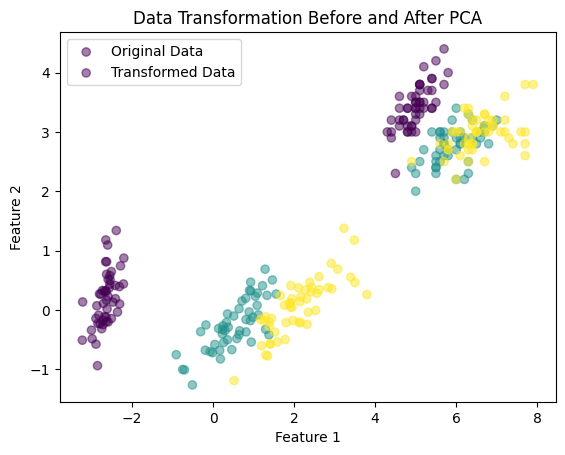

In [35]:
# 40
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5, label="Original Data")
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, alpha=0.5, label="Transformed Data")
plt.legend()
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Data Transformation Before and After PCA")
plt.show()

In [36]:
# 41
from sklearn.datasets import load_wine
from sklearn.metrics import classification_report

data = load_wine()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Classification Report:", classification_report(y_test, y_pred))

Classification Report:               precision    recall  f1-score   support

           0       0.86      0.86      0.86        14
           1       0.79      0.79      0.79        14
           2       0.38      0.38      0.38         8

    accuracy                           0.72        36
   macro avg       0.67      0.67      0.67        36
weighted avg       0.72      0.72      0.72        36



In [37]:
# 42
distance_metrics = ['euclidean', 'manhattan', 'minkowski']
errors = {}
for metric in distance_metrics:
    knn_regressor = KNeighborsRegressor(metric=metric)
    knn_regressor.fit(X_train, y_train)
    errors[metric] = mean_squared_error(y_test, knn_regressor.predict(X_test))
print("Prediction Error for Different Distance Metrics:", errors)

Prediction Error for Different Distance Metrics: {'euclidean': 0.29, 'manhattan': 0.21666666666666667, 'minkowski': 0.29}


In [38]:
# 43
from sklearn.metrics import roc_auc_score

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_scores = knn.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, y_scores, multi_class='ovr')
print("ROC-AUC Score:", roc_auc)

ROC-AUC Score: 0.8828463203463204


In [39]:
# 44
variance_captured = pca.explained_variance_ratio_
print("Variance Captured by Each Principal Component:", variance_captured)

Variance Captured by Each Principal Component: [0.92461872 0.05306648]


In [40]:
# 45
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=5)
X_selected = selector.fit_transform(X, y)
X_train_selected, X_test_selected, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42
)
knn = KNeighborsClassifier()
knn.fit(X_train_selected, y_train)
print("Accuracy after Feature Selection:", accuracy_score(y_test, knn.predict(X_test_selected)))

Accuracy after Feature Selection: 0.7777777777777778


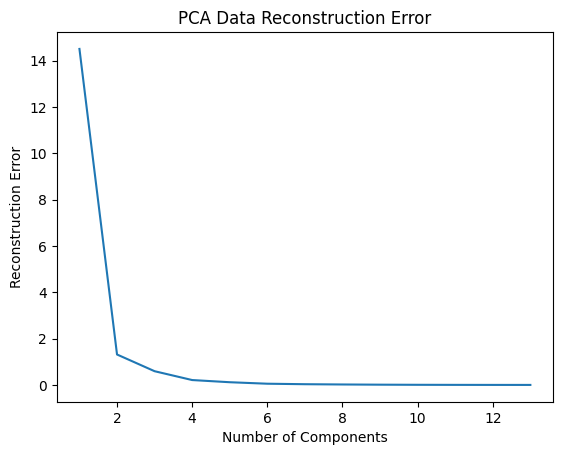

In [41]:
# 46
reconstruction_error = []
components_range = range(1, X.shape[1] + 1)
for n_components in components_range:
    pca = PCA(n_components=n_components)
    X_reduced = pca.fit_transform(X)
    X_reconstructed = pca.inverse_transform(X_reduced)
    error = ((X - X_reconstructed) ** 2).mean()
    reconstruction_error.append(error)
plt.plot(components_range, reconstruction_error)
plt.xlabel("Number of Components")
plt.ylabel("Reconstruction Error")
plt.title("PCA Data Reconstruction Error")
plt.show()

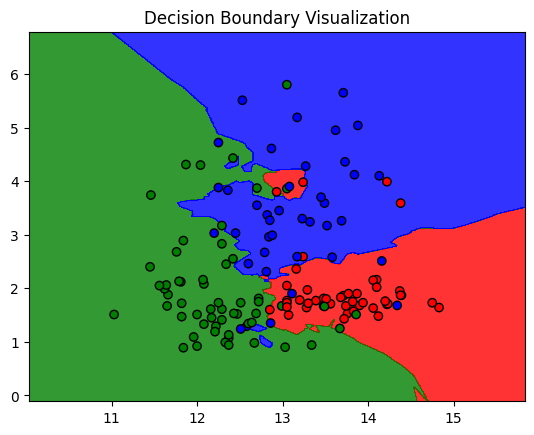

In [42]:
# 47
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train[:, :2], y_train)
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(['red', 'green', 'blue']))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', cmap=ListedColormap(['red', 'green', 'blue']))
plt.title("Decision Boundary Visualization")
plt.show()

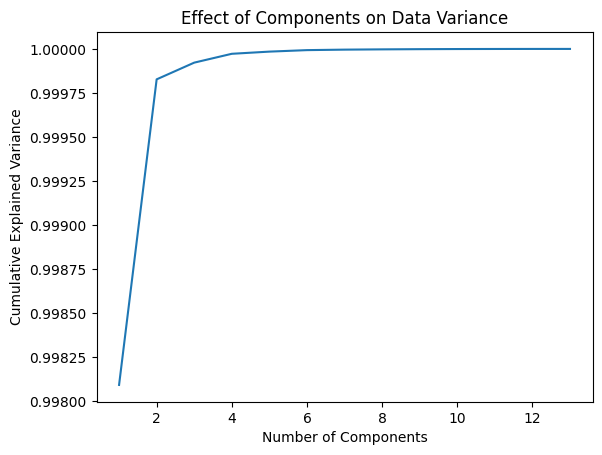

In [43]:
# 48
variance_explained = []
for n in range(1, X.shape[1] + 1):
    pca = PCA(n_components=n)
    pca.fit(X)
    variance_explained.append(sum(pca.explained_variance_ratio_))
plt.plot(range(1, X.shape[1] + 1), variance_explained)
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Effect of Components on Data Variance")
plt.show()